**About Data**

Date: This column represents the date on which the investment in the startup was made. It could be in a specific date format, and it indicates the timing of the investment.

Indian Startup: This column contains the name or identifier of the Indian startup that received the investment. It identifies the specific company involved in the funding.

Vertical:This column represents the industry or sector to which the startup belongs. It provides information about the business domain or category of the startup.

City:This column indicates the city where the startup is based or has a significant presence. It provides geographical information about the location of the startup.

Round:This column denotes the funding round or stage of investment. It could be Seed, Series A, Series B, and so on, indicating the maturity and stage of the startup's development when the investment was made.

Amount:This column represents the amount of investment made in the startup and indicates the financial magnitude of the investment.

**Objectives**

Analyze temporal patterns in startup investments to identify trends and shifts over time.

Determine which industries or verticals attract the most funding and understand emerging sectors.

Examine the distribution of startups and investment hubs across different cities and regions

Assess the stages of development of startups by analyzing the distribution of funding rounds.

Identify patterns in investor preferences, including types of startups, preferred stages, and regional focus.

In [1]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv(r"C:\Users\pktal\Downloads\startup.csv")
df.shape

(2821, 8)

In [7]:
df.isnull().sum()

date             0
startup          0
vertical         0
subvertical    744
city             0
investors        0
round            0
amount           0
dtype: int64

In [8]:
df.shape

(2821, 8)

### Data Cleaning

In [9]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
0,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
2,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
3,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
4,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2821 entries, 0 to 2820
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         2821 non-null   object 
 1   startup      2821 non-null   object 
 2   vertical     2821 non-null   object 
 3   subvertical  2077 non-null   object 
 4   city         2821 non-null   object 
 5   investors    2821 non-null   object 
 6   round        2821 non-null   object 
 7   amount       2821 non-null   float64
dtypes: float64(1), object(7)
memory usage: 176.4+ KB


### Investors Analysis

In [11]:
# Getting the investor name


# Getting the recent investments of a particular investor
df[df["investors"].str.contains("Anupam Mittal")].head()[["date", "startup", "vertical", "city", "round", "amount"]]

,date,startup,vertical,city,round,amount
612,2017-02-08,Zepo,Consumer Internet,Mumbai,Seed Funding,500000.0
1165,2016-02-11,LetsMD,Consumer Internet,New Delhi,Seed Funding,0.0
1348,2016-09-15,infeedo,Consumer Internet,Gurgaon,Seed Funding,200000.0
1393,2016-02-08,Daily Ninja,Consumer Internet,Bangalore,Seed Funding,0.0
1394,2016-02-08,Yumlane,Food & Beverage,Mumbai,Seed Funding,1000000.0


**Analysis**

The dataset primarily includes startups from the Consumer Internet and Food & Beverage sectors.

Funding rounds are primarily Seed Funding, which is common for early-stage startups.

Mumbai, New Delhi, Gurgaon, and Bangalore are among the cities where these startups are based, indicating geographical diversity.


In [12]:
# Getting Biggest Investments
df[df["investors"].str.contains("Capricorn Investment Group")].groupby("startup")["amount"].sum().sort_values(ascending=False)

startup
Ezetap    25000000.0
Name: amount, dtype: float64

In [13]:
df[df["investors"].str.contains("Anupam Mittal")].groupby("vertical")["amount"].sum().sort_values(ascending=False)

vertical
Logistics Tech                 5500000.0
Food Delivery Platform         1750000.0
Consumer Internet              1200000.0
Food & Beverage                1000000.0
Used Car Marketplace            500000.0
FMCG                            370000.0
Live video streaming app             0.0
Splitting Bills Mobile App           0.0
Startup Funding Marketplace          0.0
Tech enabled AC bus service          0.0
Technology                           0.0
eCommerce                            0.0
Name: amount, dtype: float64

**Analysis**

The data highlights the varying levels of funding across different verticals, with Logistics Tech, Food Delivery Platform, and Consumer Internet leading in terms of investment amounts.

Understanding funding distribution across verticals can provide insights into investor preferences, industry trends, and areas of innovation in the startup ecosystem.

<Axes: ylabel='amount'>

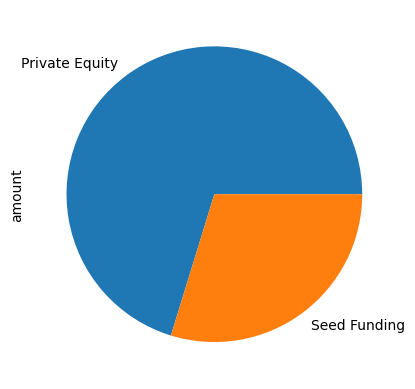

In [14]:
# Getting invested in which stage
df[df["investors"].str.contains("Anupam Mittal")].groupby("round")["amount"].sum().sort_values(ascending=False).plot(kind="pie")

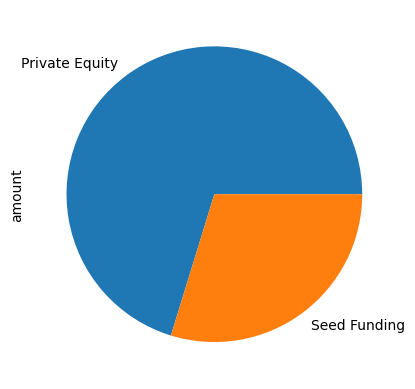

In [15]:
round_df = df[df["investors"].str.contains("Anupam Mittal")].groupby("round")["amount"].sum().sort_values(ascending=False).plot(kind="pie")

<Axes: ylabel='amount'>

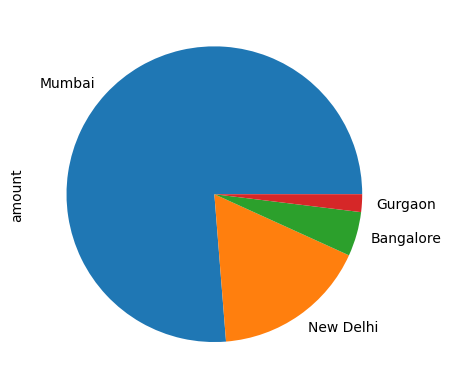

In [16]:
# Getting invested in which city
df[df["investors"].str.contains("Anupam Mittal")].groupby("city")["amount"].sum().sort_values(ascending=False).plot(kind="pie")

In [21]:
# Year on Year(YoY) investment graph

df["date"] = pd.to_datetime(df["date"])

# Now you can extract the year
df["year"] = df["date"].dt.year

In [22]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount,year
0,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,2020
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,2020
2,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,2020
3,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,2020
4,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,2020


<Axes: xlabel='year'>

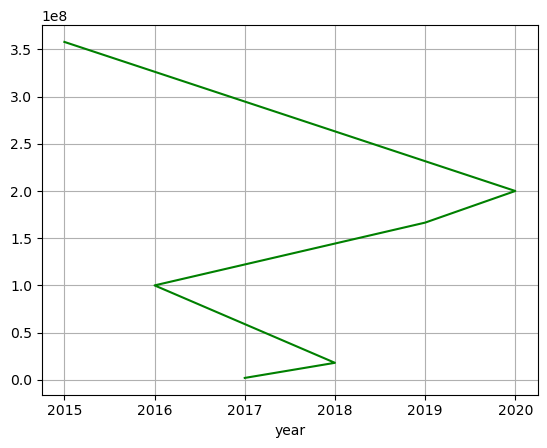

In [23]:
df[df["investors"].str.contains("Tiger Global Management")].groupby("year")["amount"].sum().sort_values(ascending=False).plot(grid=True, color="green")

### Overall Analysis

In [24]:
# find the total amount invested
round(df["amount"].sum())

35932149535

In [25]:
# find the maximum amount invested
df.groupby("startup")["amount"].max().sort_values(ascending=False)[0] 

3900000000.0

In [26]:
# Find the average amount invested
round(df.groupby("startup")["amount"].sum().mean())

15636270

In [27]:
# total funded startups
df["startup"].nunique()

2298

In [28]:
# Month on Month(MoM) chart
df["month"] = df["date"].dt.month

In [29]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount,year,month
0,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,2020,9
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,2020,1
2,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,2020,9
3,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,2020,2
4,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,2020,2


In [30]:
# total number of fundings in each month of each year
df.groupby(["year", "month"])["startup"].count().reset_index()

,year,month,startup
0,2015,1,35
1,2015,2,14
2,2015,3,36
3,2015,4,65
4,2015,5,53
...,...,...,...
58,2019,12,10
59,2020,1,2
60,2020,2,2
61,2020,9,2


**Interprtation**

In 2015, startup counts appear to increase from January to April, with variations in subsequent months.

There is a spike in startup counts in certain months of 2017 and 2018.

The data shows a noticeable decline in startup counts from 2019 onwards, with lower counts in 2020.

In [31]:
# total amount funded each month of each year
df.groupby(["year", "month"])["amount"].sum().reset_index()

,year,month,amount
0,2015,1,639350000.0
1,2015,2,189961000.0
2,2015,3,231595000.0
3,2015,4,546795000.0
4,2015,5,169870000.0
...,...,...,...
58,2019,12,444500000.0
59,2020,1,17048394.0
60,2020,2,4800000.0
61,2020,9,218358860.0


**Interpretation**

In 2015, there is a notable increase in total funding amounts from January to April, followed by fluctuations in subsequent months.

There is a peak in funding amounts in certain months of 2017 and 2018.

The data shows a noticeable decline in funding amounts from 2019 onwards, with lower amounts in 2020.

### Startup Analysis

In [33]:
df.sample(10)

,date,startup,vertical,subvertical,city,investors,round,amount,year,month
656,2017-04-07,Droom,eCommerce,Online marketplace for automobiles,Gurgaon,"Asset Management (Asia) Ltd, Digital Garage Inc",Private Equity,20000000.0,2017,4
968,2017-03-31,FalconBrick,Technology,Real-Estate Workflow mobile app,Bangalore,"Satveer Thakral, LetsVenture, Mumbai Angels",Seed Funding,0.0,2017,3
1492,2016-07-07,Adytude,Consumer Internet,Gamified Consumer Insights Portal,New Delhi,Indian Angel Network,Private Equity,1000000.0,2016,7
54,2019-08-23,AdmitKard,EdTech,University Admissions,Noida,Growth DNA,Seed Round,1000000.0,2019,8
1791,2016-01-03,Gympik,Consumer Internet,"Fitness Centres, Gym Discovery online marketplace",Bangalore,RoundGlass Partners,Private Equity,0.0,2016,1
1361,2016-09-21,Pepperfry,eCommerce,Furniture eTailer,Mumbai,"Goldman Sachs Group, Zodius Technology Fund, N...",Private Equity,31300000.0,2016,9
1163,2016-02-11,FreshDesk,Consumer Internet,SAAS Based HelpDesk Services,Chennai,"Sequoia Capital India, Accel Partners",Private Equity,55000000.0,2016,2
322,2018-03-22,Slang Labs,Technology,Voice-based assistant platform,Bengaluru,Endiya Partners,Seed / Angel Funding,1240000.0,2018,3
1085,2017-01-30,FabX,eCommerce,Used Furniture Marketplace,Mumbai,The Ten Minute Million,Seed Funding,68000.0,2017,1
1800,2016-04-03,TinyStep,Consumer Internet,Parenting Social Network Platform,Bangalore,Matt Glickman,Private Equity,0.0,2016,4


In [34]:
# getting the investors for a particular startup
df[df["startup"].str.contains("Lenskart")].head()[["date", "vertical", "city", "round", "amount"]]

,date,vertical,city,round,amount
15,2019-12-20,E-Commerce,Faridabad,Series G,231000000.0
281,2018-04-19,Consumer Internet,Faridabad,Private Equity,0.0
1323,2016-06-09,eCommerce,New Delhi,Private Equity,0.0
1645,2016-04-05,eCommerce,New Delhi,Private Equity,60000000.0


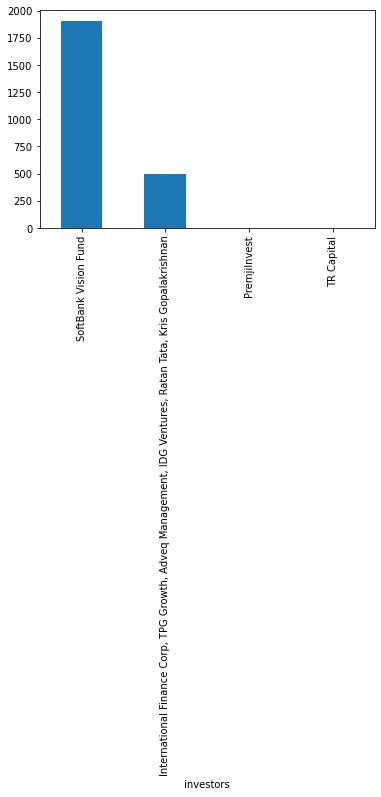

In [61]:
# getting biggest investors
df[df["startup"].str.contains("Lenskart")].groupby("investors")["amount"].sum().sort_values(ascending=False).plot(kind="bar");

In [35]:
# getting invested in which round
df[df["startup"].str.contains("Monsoon Fintech")].groupby("round")["amount"].sum().sort_values(ascending=False).any() #.plot(kind="pie");

False

In [36]:
# getting invested in which city
df[df["startup"].str.contains("Lenskart")].groupby("city")["amount"].sum().sort_values(ascending=False)

city
Faridabad    231000000.0
New Delhi     60000000.0
Name: amount, dtype: float64

In [37]:
# year on year investment in startup
df[df["startup"].str.contains("Lenskart")].groupby("year")["amount"].sum() #.plot(grid=True, color="green")

year
2016     60000000.0
2018            0.0
2019    231000000.0
Name: amount, dtype: float64

<Axes: xlabel='year'>

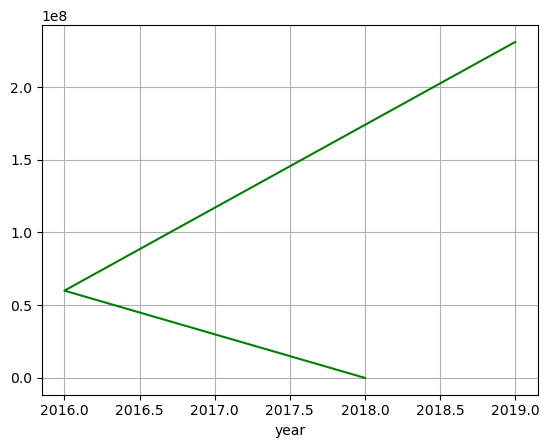

In [38]:
# Year on Year Investment Graph
df[df["startup"].str.contains("Lenskart")].groupby("year")["amount"].sum().sort_values(ascending=False).plot(grid=True, color="green")

**Managerial Implications**


Identify popular verticals and industries to align their startups with market trends.
Analyze funding trends to understand the availability of capital in different periods.
Consider geographical preferences and trends when choosing the location for the startup.
Investment Portfolio Management for Investors:


Allocate investments based on trends in funding amounts and vertical preferences.
Adjust investment strategies according to seasonal or yearly patterns in startup creation.
Diversify investments across regions and industries for risk mitigation.
Policy Formulation for Policymakers:


Design targeted policies to encourage entrepreneurship in specific verticals or regions.
Allocate resources based on observed trends in startup creation and funding.
Monitor the impact of existing policies on the startup ecosystem and make adjustments as needed.
Risk Mitigation for Investors and Entrepreneurs:


Entrepreneurs can time their market entry based on observed trends in startup creation.
Investors can adjust investment strategies to account for seasonal variations in funding.